In [65]:
from models import Battery
import matplotlib.pyplot as plt
battery = Battery(sys_id='S2')

In [66]:
# Array for testting with a timestep width of 15 minutes
test_values = np.empty(int(525600/15),)
test_values[:int(525600/15/2)] = 3000
test_values[int(525600/15/2):] = -3830
dt = 60*15
soc = 0
p_bs_list = []
soc_list = []
for value in test_values:
    p_bs, soc = battery.simulate(P_setpoint=value, soc=soc, dt=dt)
    p_bs_list.append(p_bs)
    soc_list.append(soc)
print(max(soc_list))
d = {'Test_values':test_values,'P_BS':p_bs_list, 'SOC':soc_list}
df = pd.DataFrame(d)
df['SOC'] = df['SOC'] * 100
df

0.9989512061439025


,Test_values,P_BS,SOC
0,3000.0,2998.500000,7.820323
1,3000.0,2998.500000,15.640647
2,3000.0,2998.500000,23.460970
3,3000.0,2998.500000,31.281294
4,3000.0,2998.500000,39.101617
...,...,...,...
35035,-3830.0,2423.429854,13.826647
35036,-3830.0,-3510.000000,3.312517
35037,-3830.0,1070.562911,6.089366
35038,-3830.0,1969.262433,11.238642


<AxesSubplot:>

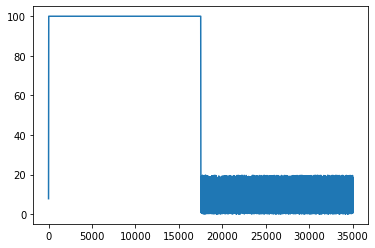

In [67]:
df['SOC'].plot()

In [ ]:
result_power = np.asanyarray(p_bs) - test_values
print(result_power)